# Projet 3 : Moteur de recommandations de films

## Contexte

<p>Un site de cinéma souhaite lancer un moteur de recommandations de films.</p>
<p>**L'objectif** de ma mission est d'élaborer une API capable de retourner 5 recommandations de films similaire et intéressant pour le visiteur.</p>
<p>
Pour cela, le client nous fournit une base de données publique d'informations sur les films mais **sans données utilisateurs** </p>
<p>
Dans ce premier programme, nous allons charger le ficher de données, faire connaissance des features et des données et essayer différentes approches de modélisation notamment en nous appuyant sur des méthodes non supervisées pour nous aider à implémenter cet API.
</p>

## 1. Importation des librairies

In [1]:
# On importe toutes les librairies nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import  manifold, cluster
from sklearn.cluster import KMeans,DBSCAN
from sklearn import metrics
from sklearn.metrics.pairwise import euclidean_distances

import seaborn as sns
from collections import Counter

%matplotlib inline

## 2. Exploration rapide des données

Chargement du fichier de données

In [2]:
# Utilisation de pandas pour lire le fichier CSV
df = pd.read_csv('movie_metadata.csv')

On affiche les 10 premières lignes de nos données

In [3]:
df.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [4]:
df.shape

(5043, 28)

La base de données comprends **5043** films décrits par **28** propriétés

In [5]:
# Visualisation des propriétés des données
list(df.columns)

['color',
 'director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'gross',
 'genres',
 'actor_1_name',
 'movie_title',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'plot_keywords',
 'movie_imdb_link',
 'num_user_for_reviews',
 'language',
 'country',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

=> Chacune des colonnes donne des informations sur le film comme l'année de sortie, le noms des acteurs, le score IMDB, le genre, ...

### Types des variables 

In [6]:
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

=> Nous avons 12 features de type catégorielle sur les 28 colonnes. Les autres variables sont numériques.

### Description des variables numériques

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4993.0,1.401943e+02,1.216017e+02,1.00,50.00,110.00,195.00,8.130000e+02
duration,5028.0,1.072011e+02,2.519744e+01,7.00,93.00,103.00,118.00,5.110000e+02
director_facebook_likes,4939.0,6.865092e+02,2.813329e+03,0.00,7.00,49.00,194.50,2.300000e+04
actor_3_facebook_likes,5020.0,6.450098e+02,1.665042e+03,0.00,133.00,371.50,636.00,2.300000e+04
actor_1_facebook_likes,5036.0,6.560047e+03,1.502076e+04,0.00,614.00,988.00,11000.00,6.400000e+05
gross,4159.0,4.846841e+07,6.845299e+07,162.00,5340987.50,25517500.00,62309437.50,7.605058e+08
num_voted_users,5043.0,8.366816e+04,1.384853e+05,5.00,8593.50,34359.00,96309.00,1.689764e+06
cast_total_facebook_likes,5043.0,9.699064e+03,1.816380e+04,0.00,1411.00,3090.00,13756.50,6.567300e+05
facenumber_in_poster,5030.0,1.371173e+00,2.013576e+00,0.00,0.00,1.00,2.00,4.300000e+01
num_user_for_reviews,5022.0,2.727708e+02,3.779829e+02,1.00,65.00,156.00,326.00,5.060000e+03


- On constate que pour les features numériques la base de données est plutôt bien remplie (peu de valeurs NaN)
- Pour la colonne gross (profit) on a un facteur x 1 000 000 entre le min et le max
- Pour le budget un facteur de 100 000 000 entre le min et le max
- Nous avons une colonne intéressante pour notre objectif : **imdb_score** : note donnée au film
- L'année maximale trouvée dans le base est 2016, elle est donc assez récente.

** <u> Gross et Budget </u> **

=> Analyse des valeurs min et max des features **gross** et **budget** pour vérifier s'il n'y pas d'erreur

In [8]:
min_gross = df['gross'].min()
max_gross = df['gross'].max()

min_budget= df['budget'].min()
max_budget = df['budget'].max() 

print("- Plus gros profit :" + '{:,.0f}'.format(max_gross) + " -> " + df[df['gross'] == max_gross]["movie_title"].values[0])
print("- Plus petit profit :" + '{:,.0f}'.format(min_gross) + " -> " + df[df['gross'] == min_gross]["movie_title"].values[0])
print("- Plus gros budget :" + '{:,.0f}'.format(max_budget) + " -> " + df[df['budget'] == max_budget]["movie_title"].values[0])
print("- Plus petit budget :" + '{:,.0f}'.format(min_budget) + " -> " + df[df['budget'] == min_budget]["movie_title"].values[0])

- Plus gros profit :760,505,847 -> Avatar 
- Plus petit profit :162 -> Skin Trade 
- Plus gros budget :12,215,500,000 -> The Host 
- Plus petit budget :218 -> Tarnation 


+ Avatar a bien fait plus de 700 millions de \$ de profit comme indiqué ici http://www.boxofficemojo.com/movies/?id=avatar.htm
+ Concernant Skin Trade, la fiche boxoffice indique un profit de 1200\$ (162\$ dans notre base)
+ The Host, la monnaie est le KRW (Corée du Sud) : http://www.imdb.com/title/tt0468492/
+ Tarnation a bien un budget de 280\$ (https://en.wikipedia.org/wiki/Tarnation_(film))


=> Le budget et le profit ne sont pas tous dans la même monnaie dans notre base. Cela explique certaines valeurs importantes.

### Analyse des correlations

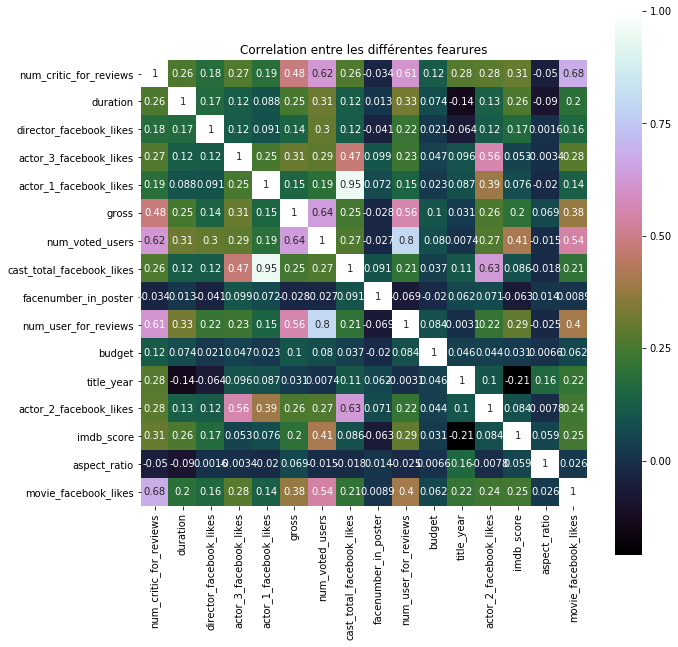

In [9]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation entre les différentes fearures')

In [10]:
correlation

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.000000,0.258486,0.180674,0.271646,0.190016,0.480601,0.624943,0.263203,-0.033897,0.609387,0.119994,0.275707,0.282306,0.305303,-0.049786,0.683176
duration,0.258486,1.000000,0.173296,0.123558,0.088449,0.250298,0.314765,0.123074,0.013469,0.328403,0.074276,-0.135038,0.131673,0.261662,-0.090071,0.196605
director_facebook_likes,0.180674,0.173296,1.000000,0.120199,0.090723,0.144945,0.297057,0.119549,-0.041268,0.221890,0.021090,-0.063820,0.119601,0.170802,0.001642,0.162048
actor_3_facebook_likes,0.271646,0.123558,0.120199,1.000000,0.249927,0.308026,0.287239,0.473920,0.099368,0.230189,0.047451,0.096137,0.559662,0.052633,-0.003366,0.278844
actor_1_facebook_likes,0.190016,0.088449,0.090723,0.249927,1.000000,0.154468,0.192804,0.951661,0.072257,0.145461,0.022639,0.086873,0.390487,0.076099,-0.020049,0.135348
gross,0.480601,0.250298,0.144945,0.308026,0.154468,1.000000,0.637271,0.247400,-0.027755,0.559958,0.102179,0.030886,0.262768,0.198021,0.069346,0.378082
num_voted_users,0.624943,0.314765,0.297057,0.287239,0.192804,0.637271,1.000000,0.265911,-0.026998,0.798406,0.079621,0.007397,0.270790,0.410965,-0.014761,0.537924
cast_total_facebook_likes,0.263203,0.123074,0.119549,0.473920,0.951661,0.247400,0.265911,1.000000,0.091475,0.206923,0.036557,0.109971,0.628404,0.085787,-0.017885,0.209786
facenumber_in_poster,-0.033897,0.013469,-0.041268,0.099368,0.072257,-0.027755,-0.026998,0.091475,1.000000,-0.069018,-0.019559,0.061504,0.071228,-0.062958,0.013713,0.008918
num_user_for_reviews,0.609387,0.328403,0.221890,0.230189,0.145461,0.559958,0.798406,0.206923,-0.069018,1.000000,0.084292,-0.003147,0.219496,0.292475,-0.024719,0.400594


==> On constate une corrélation entre :
- num_critic_for_reviews et num_voted_users
- gross et num_voted_users, num_user_for_reviews  et num_critic_for_reviews
- cast_total_facebook_likes et actor_1_facebook_likes, cast_total_facebook_likes et actor_2_facebook_likes et dans une certaine mesure entre cast_total_facebook_likes et actor_3_facebook_likes
- num_user_for_reviews et num_critic_for_reviews
- num_user_for_reviews et num_voted_users
- num_critic_for_reviews et movie_facebook_likes

## 3. Traitement  préalable des données

### Suppression des doublons

=> On supprime du dataset toutes les données en double. On se base pour celà sur les colonnes titre et année.

In [11]:
#remove duplicate
df.drop_duplicates(['movie_title', 'title_year'], inplace=True)
df.shape

(4919, 28)

=> On arrive à 4919 films dans la base

### Suppression des colonnes inutiles pour le projet
** <u> Plot Keywords </u>**

In [12]:
texts = df['plot_keywords'].dropna().str.split('|')
filteredwords = [t for i, l in enumerate(texts) for t in l]
c = Counter(filteredwords)
len(c)


#sample_dict = dict()
#for i in texts:
#    sample_dict.update(Counter(i))
#sum(sample_dict.values()) 

8085

** plot_keywords ** contient plus de 8000 valeurs possibles.

=> La colonne plot_keywords contient énormément de valeurs possibles. De plus comme les keywords sont libres, ils ne nous aideront pas beaucoup à identifier des différences ou des similitudes entre les films. <br/>
Nous avons fait donc le choix de les supprimer.

---

In [13]:
del df['plot_keywords']

=> Nous avons considéré que les colonnes  **aspect_ratio**, **content rating**, **facenumber_in_poster**, **movie_imdb_link** n'allaient pas être pertinents pour notre objectif de recommandation de films. Nous avons fait le choix de les supprimer.


=> Nous avons vu qu'il y avait une corrélation entre **cast_total_facebook_likes** et les features **actor_1_facebook_likes**, **actor_2_facebook_likes**, **actor_3_facebook_likes**. On gardera donc que **cast_total_facebook_likes** dans notre dataset.

In [14]:
del df['aspect_ratio']
del df['content_rating']
del df['facenumber_in_poster']
del df['movie_imdb_link']
del df['actor_1_facebook_likes']
del df['actor_2_facebook_likes']
del df['actor_3_facebook_likes']

### Traitement des valeurs manquantes

In [15]:
# On compte le nombre de valeurs vides par colonne
print(df.isnull().sum())

color                         19
director_name                102
num_critic_for_reviews        49
duration                      15
director_facebook_likes      102
actor_2_name                  13
gross                        863
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
num_user_for_reviews          21
language                      12
country                        5
budget                       485
title_year                   106
imdb_score                     0
movie_facebook_likes           0
dtype: int64


- La plupart des colonnes contient des données bien remplies. 
- Celles contenant le plus de données manquantes sont : **Gross**, **Budget**

####  [x] Remplacement par la moyenne

==> Pour les colonnes suivantes nous avons fait le choix de remplacer les valeurs vides par la moyenne

In [16]:
df['num_critic_for_reviews'].fillna(df['num_critic_for_reviews'].median(), inplace=True)
df['duration'].fillna(df['duration'].median(), inplace=True)
df['director_facebook_likes'].fillna(df['director_facebook_likes'].median(), inplace=True)
df['num_user_for_reviews'].fillna(df['num_user_for_reviews'].median(), inplace=True)
df['title_year'].fillna(df['title_year'].median(), inplace=True)
df['budget'].fillna(df['budget'].median(), inplace=True)

####  [x] Remplacement spécifiques de valeurs vides

** <u>Couleur</u> **

=> En fonction de l'année du film on détermine si film en couleur ou N&B<br/>
=> Si le film date d'avant 1930 il sera considéré comme Noir et Blanc.

In [17]:
# Avant 1930 les films étaient en N&B
get_year=lambda x: 'Color' if x > 1930 else 'Black and White'

mask=pd.isnull(df['color'])
for index, row in df[mask].iterrows():
    df.loc[index,'color']=get_year(row['title_year'])
    

=> la colonne couleur est mise à jour pour les valeurs vides.

** <u>Langues et Pays </u> **

In [18]:
# Analyse des données sans langue renseignée
df[pd.isnull(df['language'])]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,num_user_for_reviews,language,country,budget,title_year,imdb_score,movie_facebook_likes
4,Color,Doug Walker,108.0,103.0,131.0,Rob Walker,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,153.5,NaN,NaN,19850000.0,2005.0,7.1,0
279,Color,Christopher Barnard,108.0,22.0,0.0,NaN,NaN,Comedy,Mathew Buck,"10,000 B.C.",6,5,NaN,153.5,NaN,NaN,19850000.0,2005.0,7.2,0
2459,Color,NaN,14.0,60.0,48.0,Dylan Walsh,NaN,Drama|Mystery,Poppy Montgomery,Unforgettable,12854,1906,Dallas Roberts,44.0,NaN,USA,19850000.0,2005.0,6.7,0
3086,Color,Christopher Cain,43.0,111.0,58.0,Taylor Handley,1066555.0,Drama|History|Romance|Western,Jon Gries,September Dawn,2618,1526,Trent Ford,111.0,NaN,USA,11000000.0,2007.0,5.8,411
3539,Color,Richard Rich,2.0,45.0,24.0,Kate Higgins,NaN,Action|Adventure|Animation|Comedy|Drama|Family...,Debi Derryberry,Alpha and Omega 4: The Legend of the Saw Tooth...,192,236,Cindy Robinson,6.0,NaN,USA,7000000.0,2014.0,6.0,41
3869,Color,Mel Brooks,39.0,87.0,0.0,Dom DeLuise,NaN,Comedy|Romance,Sid Caesar,Silent Movie,12666,2951,Bernadette Peters,61.0,NaN,USA,4400000.0,1976.0,6.7,629
4110,Color,Michael Landon Jr.,5.0,87.0,84.0,Kevin Gage,252726.0,Drama|Family|Western,William Morgan Sheppard,Love's Abiding Joy,1289,2715,Brianna Brown,18.0,NaN,USA,3000000.0,2006.0,7.2,76
4409,Color,John Stockwell,2.0,90.0,134.0,T.J. Storm,NaN,Action,Matthew Ziff,Kickboxer: Vengeance,246,261818,Sam Medina,1.0,NaN,USA,17000000.0,2016.0,9.1,0
4630,Color,Jonathan Meyers,1.0,111.0,0.0,Luke Perry,NaN,Drama,Justin Baldoni,A Fine Step,207,2677,Leonor Varela,1.0,NaN,USA,1000000.0,2014.0,5.3,212
4810,Black and White,D.W. Griffith,69.0,123.0,204.0,Mae Marsh,NaN,Drama|History|War,Lillian Gish,Intolerance: Love's Struggle Throughout the Ages,10718,481,Walter Long,88.0,NaN,USA,385907.0,1916.0,8.0,691


On observant chacune des lignes contenant des valeurs vides (moins d'une quinzaine) : <br/>
=> On constate que souvent le pays associé au valeur langue vide est USA. On peut donc partir du principe
que la langue est English.<br/>
=> Pays manquants, on remplace par USA car majoritaire dans notre base.

In [19]:
# On remplace les valeurs vide par la valeur la plus fréquente
df[['language']] = df[['language']].fillna("English")
df[['country']] = df[['country']].fillna("USA")

** <u>Directeurs et Acteurs</u> **

=> Pour les noms des acteurs et directeur, on a décidé de les remplacer par les valeurs vides par la chaîne "Unknown" (inconnu)

In [20]:
# Set unknown value for these features
df[['director_name']] = df[['director_name']].fillna("Unknown")
df[['actor_1_name']] = df[['actor_1_name']].fillna("Unknown")
df[['actor_2_name']] = df[['actor_2_name']].fillna("Unknown")
df[['actor_3_name']] = df[['actor_3_name']].fillna("Unknown")

####  [x] Utilisation de la regression linéaire

** <u>Bénéfice (gross)</u> **

=> Dans la matrice de correlation, nous avons vu une certaine corrélation entre **gross** et **num_voted_users**,**num_user_for_reviews** et **num_critic_for_reviews**.<br/>
=> Nous allons nos baser sur ces variables pour déterminer les valeurs de **gross** à l'aide de la régression linéaire.

In [21]:
msk = df['gross'].notnull()

X = df[msk][['num_voted_users','num_user_for_reviews','num_critic_for_reviews']]
y = df[msk]['gross']

# on split en training et testing set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

# score de notre regression
print("score de regression :" + str(regr.score(x_test, y_test)))

# On prédit les valeurs vides
x_pred = df[~msk][['num_voted_users','num_user_for_reviews','num_critic_for_reviews']]
ypred=regr.predict(x_pred)

# On remplace les valeurs vides par les valeurs prédites
df.loc[df['gross'].isnull(), 'gross']=ypred

score de regression :0.412240196971


=> On remarque que le score de regression est un faible.

### Sauvegarde du dataset nettoyé

In [22]:
# sauvegarde du dataframe nettoyé dans nouveau ficher csv
df.to_csv('movie_metadata_cleaned.csv', index=True, index_label='index_label')

## 4. Vectorisation de variables catégorielles

On créer une méthode pour la vectorisation. Cela nous évitera d'écrire le même code plusieurs fois.

In [23]:
# Vectorization de la variable. Ajoute les colonnes dans le dataframe et supprime la colonne d'origine
# Le seuil correspond à l'occurence minimum de valeur présentes dans le dataset pour l'ajout d'une nouvelle colonne
def vectorizedVariable(data, feature_name, threshold=0) :
    values=data[feature_name]
    counts=values.value_counts()
    mask = values.isin(counts[counts > threshold].index) 
    dum=values[mask].str.get_dummies()
    dum.columns = [feature_name +'_' + str(col)  for col in dum.columns]
    data = pd.concat([data, dum], axis=1)
    data=data.fillna(0)
    del data[feature_name]
    return data

=> Pour certaines données catégorielles pertinentes pour notre objectif, nous décidons de faire une vectorisation.<br/>
=> Les variables pertinentes selon nous :
- genres
- couleurs


In [24]:
# Genres
df = vectorizedVariable(df,'genres')

#Colors
df = vectorizedVariable(df,'color')
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_2_name,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,...,genres_Reality-TV,genres_Romance,genres_Sci-Fi,genres_Short,genres_Sport,genres_Thriller,genres_War,genres_Western,color_ Black and White,color_Color
0,James Cameron,723.0,178.0,0.0,Joel David Moore,7.605058e+08,CCH Pounder,Avatar,886204,4834,...,0,0,1,0,0,0,0,0,0,1
1,Gore Verbinski,302.0,169.0,563.0,Orlando Bloom,3.094042e+08,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,...,0,0,0,0,0,0,0,0,0,1
2,Sam Mendes,602.0,148.0,0.0,Rory Kinnear,2.000742e+08,Christoph Waltz,Spectre,275868,11700,...,0,0,0,0,0,1,0,0,0,1
3,Christopher Nolan,813.0,164.0,22000.0,Christian Bale,4.481306e+08,Tom Hardy,The Dark Knight Rises,1144337,106759,...,0,0,0,0,0,1,0,0,0,1
4,Doug Walker,108.0,103.0,131.0,Rob Walker,2.015466e+07,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,...,0,0,0,0,0,0,0,0,0,1


=> Vectorisation des variables suivantes : 
- Languages
- Country
- Director Name

=> On ne vectorise que les valeurs présentes dans au moins 5 films (5 car on doit proposer 5 films à l'utilisateur).

In [25]:
# Languages et Directeurs : on ne garde que les langues présentes dans au moins 5 films
df = vectorizedVariable(df,'language',5)
df = vectorizedVariable(df,'country',5)
df = vectorizedVariable(df,'director_name',5)
del df['director_name_Unknown']
df.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_2_name,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,...,director_name_Tom Shadyac,director_name_Tony Scott,director_name_Tyler Perry,director_name_Wes Anderson,director_name_Wes Craven,director_name_William Friedkin,director_name_Wolfgang Petersen,director_name_Woody Allen,director_name_Yimou Zhang,director_name_Zack Snyder
0,723.0,178.0,0.0,Joel David Moore,7.605058e+08,CCH Pounder,Avatar,886204,4834,Wes Studi,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,302.0,169.0,563.0,Orlando Bloom,3.094042e+08,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,602.0,148.0,0.0,Rory Kinnear,2.000742e+08,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,813.0,164.0,22000.0,Christian Bale,4.481306e+08,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,108.0,103.0,131.0,Rob Walker,2.015466e+07,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,Unknown,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


=> Pour les acteurs, nous avons 3 colonnes.<br/>
=> Pour faciliter les traitements, nous avons d'abord "merger" tous les noms d'acteurs dans une nouvelle colonne.<br/>
=> On vectorise alors cette colonne en gardant le critère : conservation des valeurs présentes au minimum 5 fois.

In [26]:
# create a new column containing all 3 actors names et then we create dummy columns
df['actor_combined']=df['actor_1_name'].astype(str)+'|'+df['actor_2_name']+'|'+df['actor_3_name']
dum = df['actor_combined'].str.get_dummies()
dum.drop([col for col, val in dum.sum().iteritems() if val <= 5], axis=1, inplace=True)
dum.columns = ['actor_name' +'_' + str(col)  for col in dum.columns]
df = pd.concat([df, dum], axis=1)
df=df.fillna(0)
df.drop(['actor_combined', 'actor_1_name', 
                'actor_2_name', 'actor_3_name','actor_name_Unknown'], axis=1, inplace=True)

=> On supprime les colonnes non vectorisées

In [27]:
list(df.columns)

['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'gross',
 'movie_title',
 'num_voted_users',
 'cast_total_facebook_likes',
 'num_user_for_reviews',
 'budget',
 'title_year',
 'imdb_score',
 'movie_facebook_likes',
 'genres_Action',
 'genres_Adventure',
 'genres_Animation',
 'genres_Biography',
 'genres_Comedy',
 'genres_Crime',
 'genres_Documentary',
 'genres_Drama',
 'genres_Family',
 'genres_Fantasy',
 'genres_Film-Noir',
 'genres_Game-Show',
 'genres_History',
 'genres_Horror',
 'genres_Music',
 'genres_Musical',
 'genres_Mystery',
 'genres_News',
 'genres_Reality-TV',
 'genres_Romance',
 'genres_Sci-Fi',
 'genres_Short',
 'genres_Sport',
 'genres_Thriller',
 'genres_War',
 'genres_Western',
 'color_ Black and White',
 'color_Color',
 'language_Cantonese',
 'language_English',
 'language_French',
 'language_German',
 'language_Hindi',
 'language_Italian',
 'language_Japanese',
 'language_Korean',
 'language_Mandarin',
 'language_Portuguese',
 'language_Russian',

In [28]:
df.shape

(4919, 747)

**DataSet**
- Nombre de colonnes : 747
- Nombre de films (lignes) : 4919

## 5. Notre approche

- Nous allons partitionner nos données avec des algorithmes de clustering,
- L'idée est de regrouper les films similaires,
- Ces groupes seront utilisés pour proposer à l'utilisateur 5 films appartenant au même groupe que le film de l'utilisateur
- Le choix des 5 films pourra se faire aléatoirement ou bien trouver 5 fims avec le score IMDB maximum qui sera donc plus susceptible d'intéresser le visiteur.
- Avant de tester les algorithmes de clustering nous allons faire une standardisation des données pour les centrer et les normer et faire ensuite un réduction de dimensions avec ACP. La réduction de dimension est nécessaire au clustering et pour des soucis de performance.

## 6. Standardisation des données

=> Nous allons commencer par standardiser les données pour les centrer et normer pour ensuite pouvoir faire une réduction de dimensions

In [29]:
# On supprime la colonne titre avant de standardiser
X = df.drop(['movie_title'], axis=1).values
X_std = StandardScaler().fit_transform(X)

## 6. Réduction de dimensions

### Variance expliquée

=> Faisons une analyse des composantes principales (PCA) pour identifier les réductions possibles.

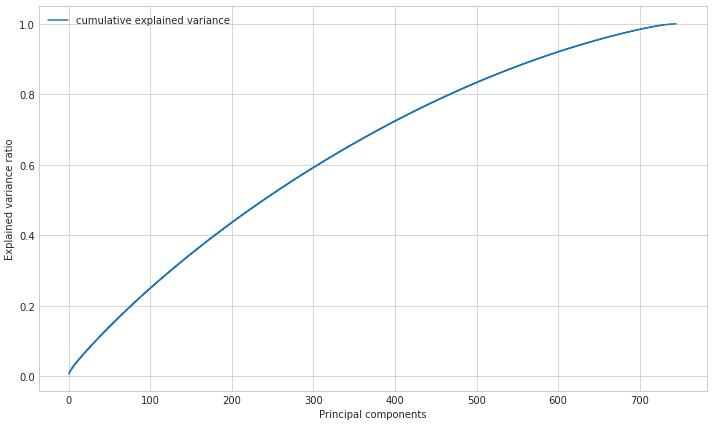

In [30]:
pca = PCA().fit(X_std)
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10, 6))
    plt.step(range(len(np.cumsum(pca.explained_variance_ratio_))), np.cumsum(pca.explained_variance_ratio_), where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

=> Avec 600 composantes, on peut couvrir plus de 90% de la variance.<br>
=> On partira donc sur une selection de 600 variables.<br/>
=> Plus on a de colonnes, plus on sera pertinent mais il ne faut pas exploser les dimensions. Il faut donc trouver un  juste équilibre.

### Projection

On projette les données sur les 600 composantes principales.

In [31]:
pca = PCA(n_components=600)
X_projected = pca.fit_transform(X_std)

In [32]:
X_projected.shape

(4919, 600)

### Sauvegarde données

In [33]:
# sauvegarde du dataframe avec réduction de dimensions dans nouveau ficher csv
np.save('movie_metadata_transformed.npy', X_projected)

## 7. Clustering avec algo non supervisés

## KMeans

=> Nous allons essayer de trouver des clusters avec la méthode non supervisé : **KMeans**.</br>
=> Nous allons tout d'abord déterminer le meilleur nombre de clusters en analysant le coefficient de silhouette.

For n_clusters = 2 The average silhouette_score is : 0.291577250011
For n_clusters = 3 The average silhouette_score is : 0.128359444903
For n_clusters = 4 The average silhouette_score is : 0.069914080713
For n_clusters = 5 The average silhouette_score is : 0.0705925187351
For n_clusters = 6 The average silhouette_score is : 0.102258157533
For n_clusters = 7 The average silhouette_score is : 0.0769490620689
For n_clusters = 8 The average silhouette_score is : -0.200624995616
For n_clusters = 9 The average silhouette_score is : -0.0282427404881


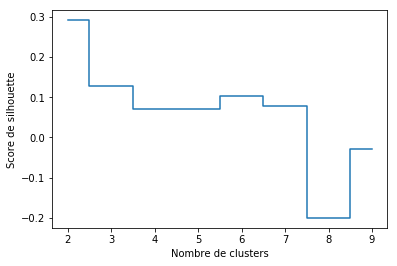

In [34]:
cluster_range = range( 2, 10 )
silhouettes = []
     
# on calcule le score de silhouette pour un nombre de clusters allant de 2 à 10    
for n_clusters in cluster_range:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict( X_projected )
    
    silhouette_avg = metrics.silhouette_score(X_projected, cluster_labels)
    silhouettes.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

# On affiche sous forme de graphe
plt.step(cluster_range, silhouettes, where='mid',label='cumulative explained variance')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')

plt.show()   

=> Le score de silhouette n'est pas terrible. On voit qu'on a un meilleur score pour **k=2**.<br/>
=> le clustering avec KMeans n'a pas donné de resultats très concluants<br/>

### Visualisation du clustering KMeans

Nous allons utiliser l'algorithme tSNE pour faire une réduction à 2 dimensions 

In [35]:
# Réduction à 2 composantes
tsne = manifold.TSNE(n_components=2, init='pca')
tsne_results = tsne.fit_transform(X_projected)

In [37]:
# Partitionnement en 2 clusters 
k = 2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_projected)
labels = kmeans.labels_

=> Puis on visualise

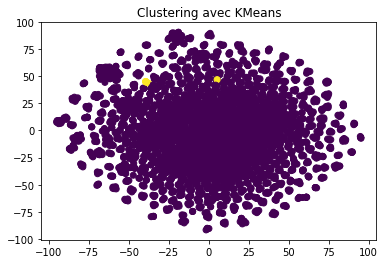

In [38]:
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels)
plt.title('Clustering avec KMeans')

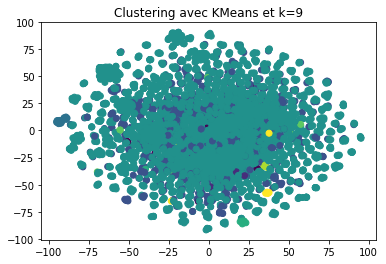

In [43]:
# Partitionnement en 9 clusters 
k = 9
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_projected)
labels = kmeans.labels_
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels)
plt.title('Clustering avec KMeans et k=9')

=> La visualisation confirme que *** KMeans ne permet pas vraiment de créer de vrais groupes homogènes de films.  ***<br/>
=> Essayons avec une autre méthode de clustering.

### DBScan

=> **DBScan** permet de trouver des clusters de formes arbitraires.<br/>
=> DBSCAN repose sur le concept de densité : un cluster est une zone de l’espace où la densité d’observations est importante<br/>
=> Il prend 2 paramètres : epsilon : quantifie une mesure du voisinage et min_samples : le nombre de points min dans un cluster.

In [44]:
dbscan = DBSCAN(eps = 0.5, min_samples = 100)
dbscan.fit(X_projected)
print(dbscan.labels_)

[-1 -1 -1 ..., -1 -1 -1]


=> -1 représente le bruit<br/>
=> Les clusters trouvés sont labelisé à partir de 1

In [45]:
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)

In [46]:
# On met "True" à l'index dans la liste core_samples_mask là où dbscan est capable de "clusteriser" les points.
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_

In [47]:
#Nombre de clusters dans les labels, ignorant les bruits si présents
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 0


=> Le resultat n'est pas du tout concluant avec DBScan. Essayons en modifiant les paramètres

In [48]:
dbscan = DBSCAN(eps = 10, min_samples = 10)
dbscan.fit(X_projected)
print(dbscan.labels_)

[-1 -1 -1 ...,  0 -1  0]


In [49]:
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
labels = dbscan.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 5


=> Le résultat est meilleur que tout à l'heure mais le nombre de cluster reste très faible par rapport au nombre de films <br/>
=> Le clustering DBScan ne semble pas être la bonne solution pour notre objectif. DBScan fonctionne bien avec des dimensions faibles. Dans notre cas, nous avons des données avec de grandes dimensions et ça explique nos résultats.<br/>
=> Le clustering n'est pas la bonne solution pour proposer des films à l'utilisateur.

### Visualisation du clustering DBScan

- Nous allons partir de la réduction TSNE effectuée précedement

=> On visualise le clustering DBScan

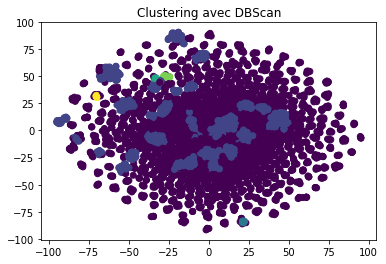

In [50]:
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels)
plt.title('Clustering avec DBScan')

=> On voit quelques clusters mais ce n'est pas suffisant pour notre besoin.<br/>
=> **Nous allons finalement essayer une autre méthode.**

## 8. Selection de films basée sur calcul de la distance

Nous allons utiliser la distance euclidienne pour trouver les films les plus proches à recommander à l'utilisateur

=> Ecrivons quelques fonctions qui vont nous permettre de trouver les k films les plus proches de l'index du film donné en entrée

In [51]:
# Retourne la position du film dans le dataset nettoyé à partir du nom du film
def getMoviePosition(title) :
    m=df.loc[df['movie_title'].str.strip() == title.strip()]
    return df.index.get_loc(m.index.values.astype(int)[0])

# Retourne le titre du film à partir de son index
def getMovieTitleFromPosition(pos):
    return df.iloc[pos]['movie_title']


# Retourne une liste des k films les plus proches du film identifié par l'index movieIndex
def getShortedDistancesMovies(X,m_pos,k):
    row_to_search = np.array(X[m_pos])
    distances=euclidean_distances(X, [row_to_search])
    closest = distances.argsort(axis=0)[:k+1].flatten()
    # on supprime le film lui même (il est le plus proche de lui même)
    closest=np.delete(closest, 0)
    movies = df.iloc[closest]
    return movies

# Affiche les 5 recommandations par rapport à film identifié par son index
def display5Recommendations(m_pos, X) :
    print("Selected movie : " +getMovieTitleFromPosition(m_pos) )
    print("\nRecommended movies :")
    print(getShortedDistancesMovies(X, m_pos, 5)['movie_title'])

### Tests et validation de la méthode

*** Pirates of the Caribbean: Dead Man's Chest  ***

In [52]:
# Les recommandations trouvées
m_index = 13 
display5Recommendations(m_index,X_projected)

Selected movie : Pirates of the Caribbean: Dead Man's Chest 

Recommended movies :
205     Pirates of the Caribbean: The Curse of the Bla...
1               Pirates of the Caribbean: At World's End 
2117                                       The Libertine 
14                                       The Lone Ranger 
1206                             The Talented Mr. Ripley 
Name: movie_title, dtype: object


=> Les recommandations semblent cohérentes. On retrouve les autres opus **des pirates des Caraïbes**<br/>
=> On retrouve également d'autres films avec Johnny Depp comme acteur et même directeur pour **The Lone Ranger**<br/>
=> Le dernier film proposé semble moins cohérent cependant. Des critères de similitude sont probablement trouvés au niveau d'autres variables (budget, score IMBD, ...)

In [53]:
# Star Trek Beyond
m_index = 57
display5Recommendations(m_index,X_projected)

Selected movie : Star Trek Beyond 

Recommended movies :
1002                        The Host 
600          Star Trek: Insurrection 
601               Battle Los Angeles 
245     Teenage Mutant Ninja Turtles 
76                        Waterworld 
Name: movie_title, dtype: object


=> 1 seul autre épisode de Star Trek est proposé. La base contient 13 autres films <br/>
=> Les autres films correspondent aussi à des films de science fiction et d'aventure<br/>
=> Les recommandations sont judicieuses même si on s'attendait à plus d'épisodes de Star Trek

*** Harry Potter and the Half-Blood Prince  ***

In [54]:
# Harry Potter and the Half-Blood Prince
m_index = 9
display5Recommendations(m_index,X_projected)

Selected movie : Harry Potter and the Half-Blood Prince 

Recommended movies :
195          Harry Potter and the Prisoner of Azkaban 
285           Harry Potter and the Chamber of Secrets 
199     Harry Potter and the Deathly Hallows: Part II 
2626                               The Woman in Black 
1146                              Victor Frankenstein 
Name: movie_title, dtype: object


=> Idem pour Harry Potter, on a bien les autres épisodes proposés <br/>
=> Les 2 autres films sont joués par le même acteur principal

*** Men in Black 3 ***

In [55]:
# Men in Black 3
m_index = 19
display5Recommendations(m_index,X_projected)

Selected movie : Men in Black 3 

Recommended movies :
352          Men in Black 
152       Men in Black II 
673                 Focus 
1596    The Addams Family 
893          Seven Pounds 
Name: movie_title, dtype: object


=> Le choix est cohérent car les autres épisodes de **Men in Black** sont proposés<br/>
=> **Focus** et **Seven Pounds** sont avec le même acteur<br/>
=> Difficile de trouver les similitudes avec **The Addams Family**

*** The Lord of the Rings: The Return of the King  ***

In [56]:
m_index = 335
display5Recommendations(m_index,X_projected)

Selected movie : The Lord of the Rings: The Return of the King 

Recommended movies :
340                The Lord of the Rings: The Two Towers 
337                                     The Lovely Bones 
2591                                                Zulu 
270     The Lord of the Rings: The Fellowship of the R...
275                                    Kingdom of Heaven 
Name: movie_title, dtype: object


=> Il y a bien les autres épisodes donc ça confirme la cohérence de la méthode <br/>
=> il manque d'autres épisides du **Seigneur des Anneaux**<br/>
=> Les autres propositions sont basées sur le genre des films<br/>
=> Difficile de trouver les critères de similitude avec le film **Zulu**

*** Cinderella ***

In [57]:
#Cinderella
m_index = 332
display5Recommendations(m_index,X_projected)

Selected movie : Cinderella 

Recommended movies :
1831    The Magic Flute 
3296            Henry V 
185             Ant-Man 
2012           Ironclad 
1730    Grace of Monaco 
Name: movie_title, dtype: object


=> **Magic Flute** : même réalisateur <br/>
=> **Henry V** et **Ironclad** : même époque que notre film mais la similitude n'est pas triviale <br/>
=> **Ant-Man** pas de lien évident trouvé à part la date du film proche du notre <br/>
=> **Grace of Monaco** : moins judicieux comme recommandation<br/>


*** The Lion King ***

In [58]:
# The Lion King
#print(getMoviePosition("The Lion King"))
m_index = 503
display5Recommendations(m_index,X_projected)

Selected movie : The Lion King 

Recommended movies :
1286                     At First Sight 
423                       Mirror Mirror 
209                               Rio 2 
403                           Enchanted 
4449    Snow White and the Seven Dwarfs 
Name: movie_title, dtype: object


=> Les films proposés sont pour certains du même genre. Exemple : **Mirror Mirror**<br/>
=> **Rio 2** est aussi un film d'animation<br/>
=> On retrouve des dessins animés de Walt Dysney comme : **Enchanted**, **Snow White and the Seven Dwarfs**<br/>
=> Pas de similitude trouvée pour **At First Sight**

## 9. Conclusion

L'analyse exploratoire des données a permis de mieux comprendre notre dataset. Elle nous a permis aussi de la nettoyer et de remplacer les valeurs manquantes.

Notre première piste était d'essayer de partionner les données par des algorithmes de clustering pour associer les films à des groupes et utiliser les groupes pour faire des recommandations à l'utilisateur.

Malheureusement les 2 algorithmes de clustering n'ont pas donnés de resultats satisfaisants.

Nous avons finalement implémenté un algorithme de calcul de distance euclidienne entre les films et les tests donnent des propositions plutôt cohérentes même si dans certains cas nous n'arrivons pas à expliquer certaines recommandations. Nous partirons donc sur cette solution pour l'implémentation de notre API.

Il faudrait tester d'autres algorithmes de calcul de distance (Manhattan, Hamming) pour vérifier si on a de meilleurs propositions. 

**Pistes d'amélioration :**
- Ne pas proposer toujours les mêmes films
- Se baser sur les scores IMDB en plus de la distance pour les propositons de films
- Construire un historique des films appréciés par chaque utilisateur et faire du collaborative filtering
